Output directory: /kaggle/working/brain_mri_charts
Loading model data...
Loaded data for 6 models

Building dataframes and summaries...
  Saved: brain_mri_model_metrics_long.csv
  Saved: brain_mri_model_summary.csv

Model Summary (Average Metrics):
Model                     Avg Accuracy Avg Precision Avg Recall   Avg F1       Avg Time (s) Best Split   Best Accuracy
----------------------------------------------------------------------------------------------------
ConvNeXt-Small            0.8657       0.8660       0.8657       0.8642       1394.1       split_80_20  0.9525      
DenseNet-121 (Run 1)      0.8327       0.8350       0.8327       0.8307       407.7        split_80_20  0.9166      
DenseNet-121 (Run 2)      0.7962       0.7982       0.7962       0.7902       491.1        split_80_20  0.9108      
EfficientNet-B4           0.6337       0.6240       0.6337       0.5749       1425.0       split_90_10  0.7262      
EfficientNetV2-S          0.8405       0.8410       0.8405     

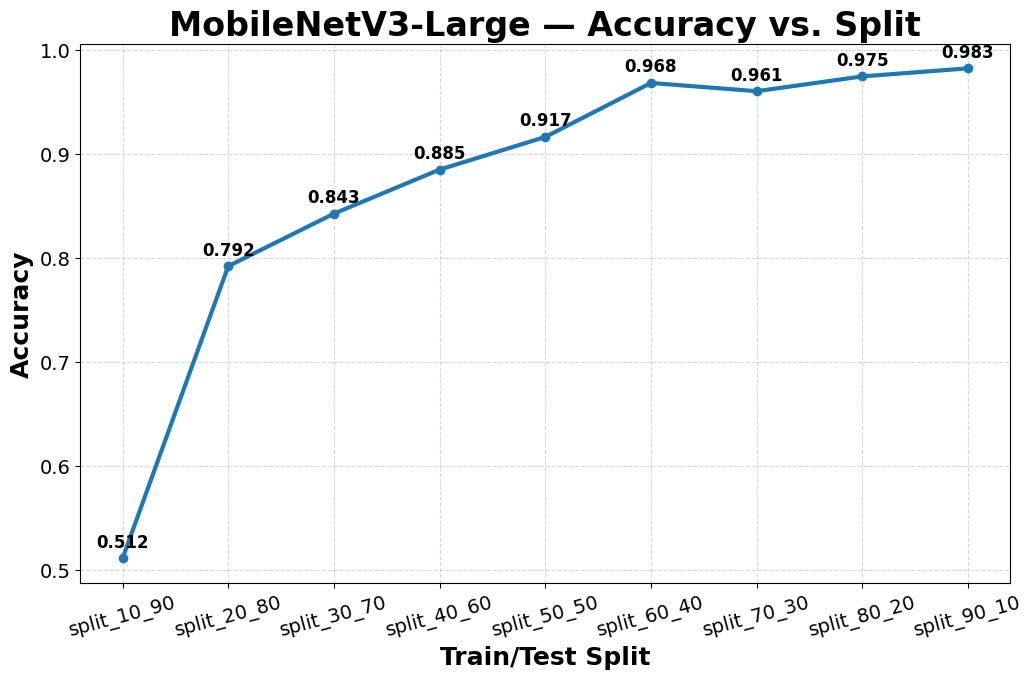

  Saved: MobileNetV3-Large_prf1.png


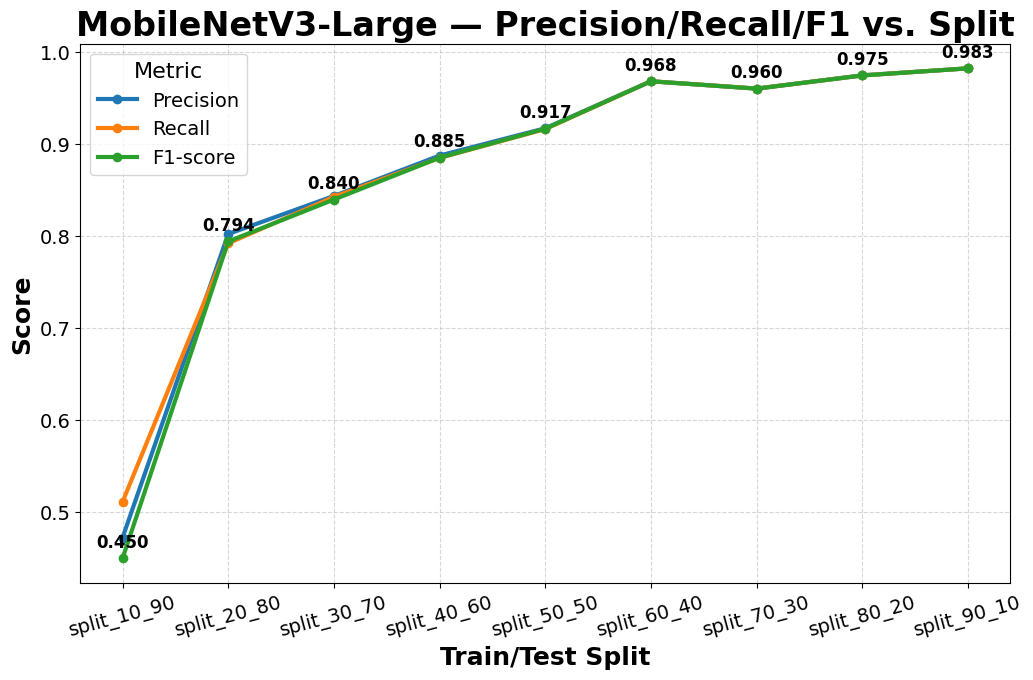

  Saved: MobileNetV3-Large_time.png


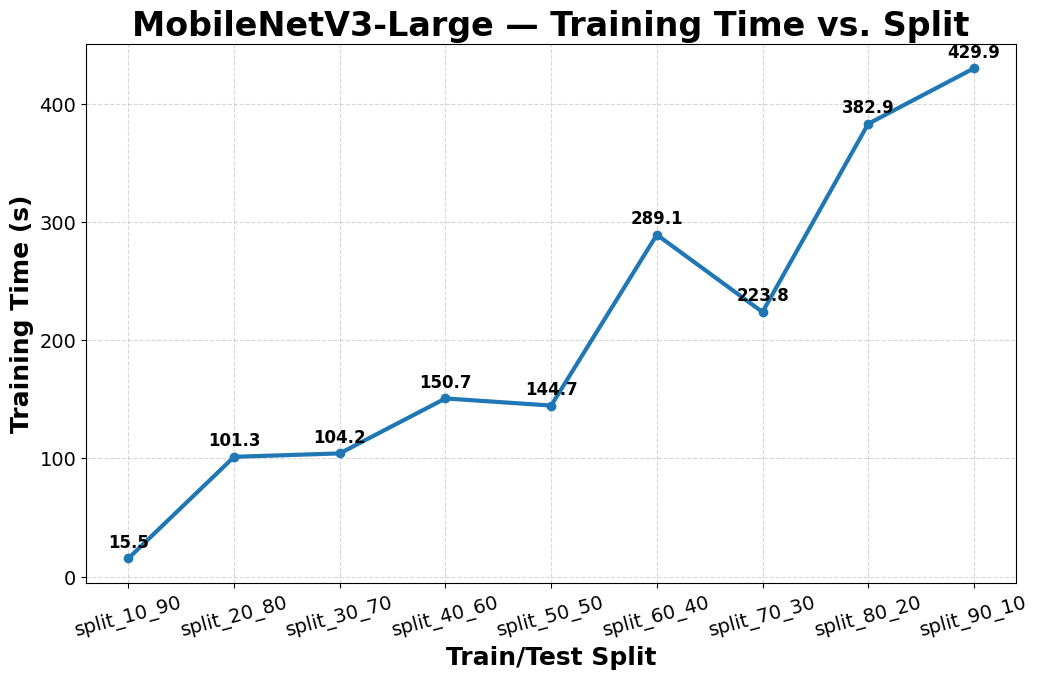

  Processing ConvNeXt-Small...
  Saved: ConvNeXt-Small_accuracy.png


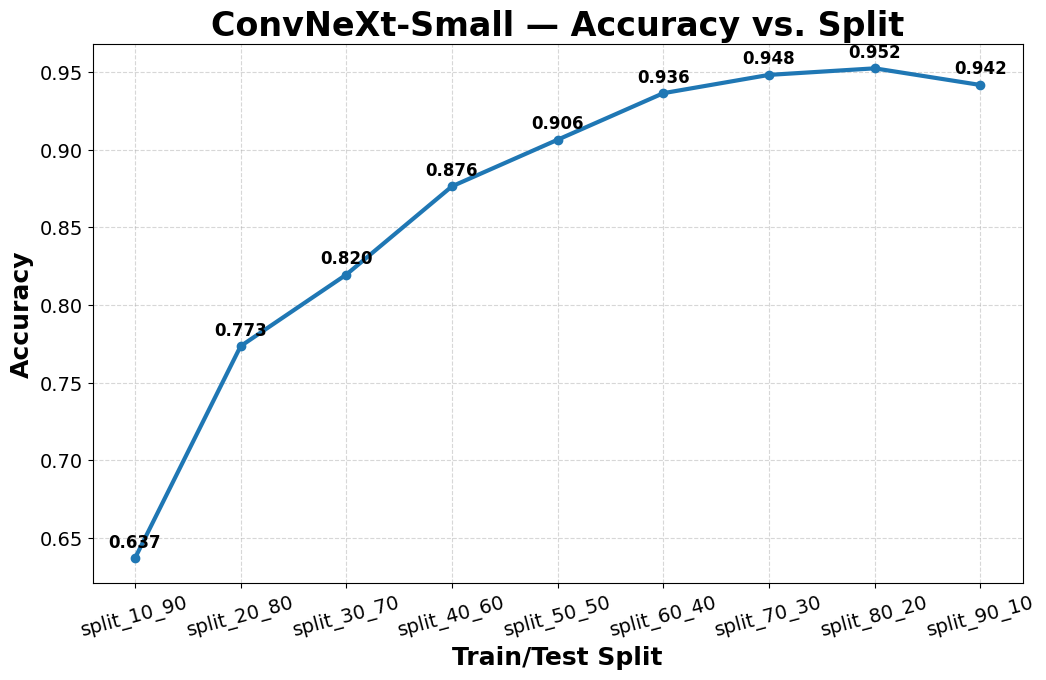

  Saved: ConvNeXt-Small_prf1.png


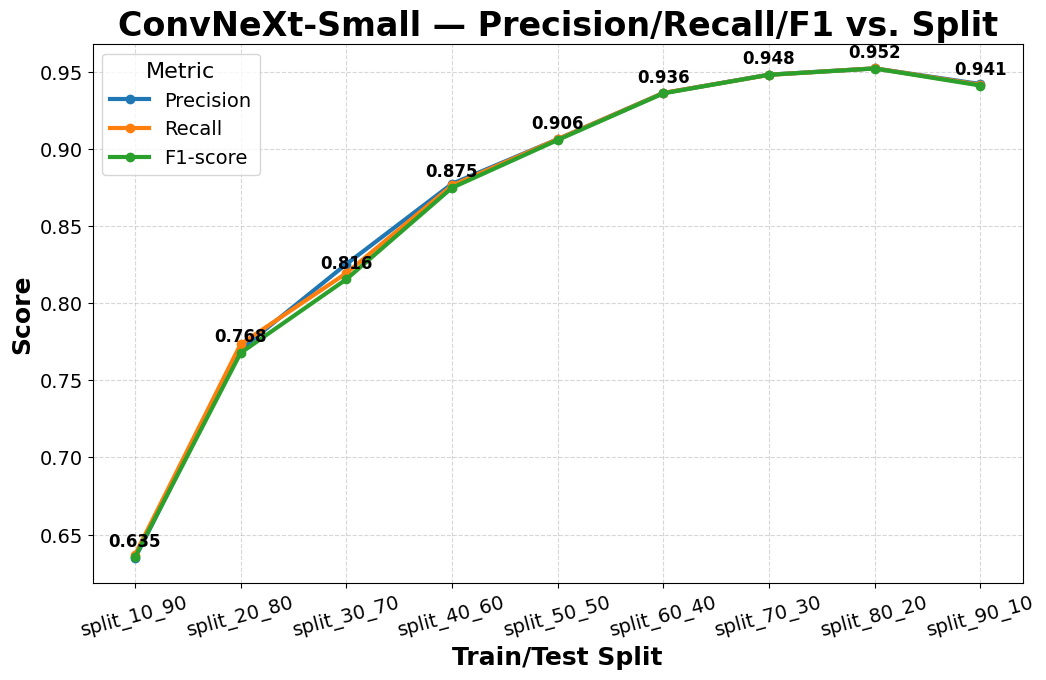

  Saved: ConvNeXt-Small_time.png


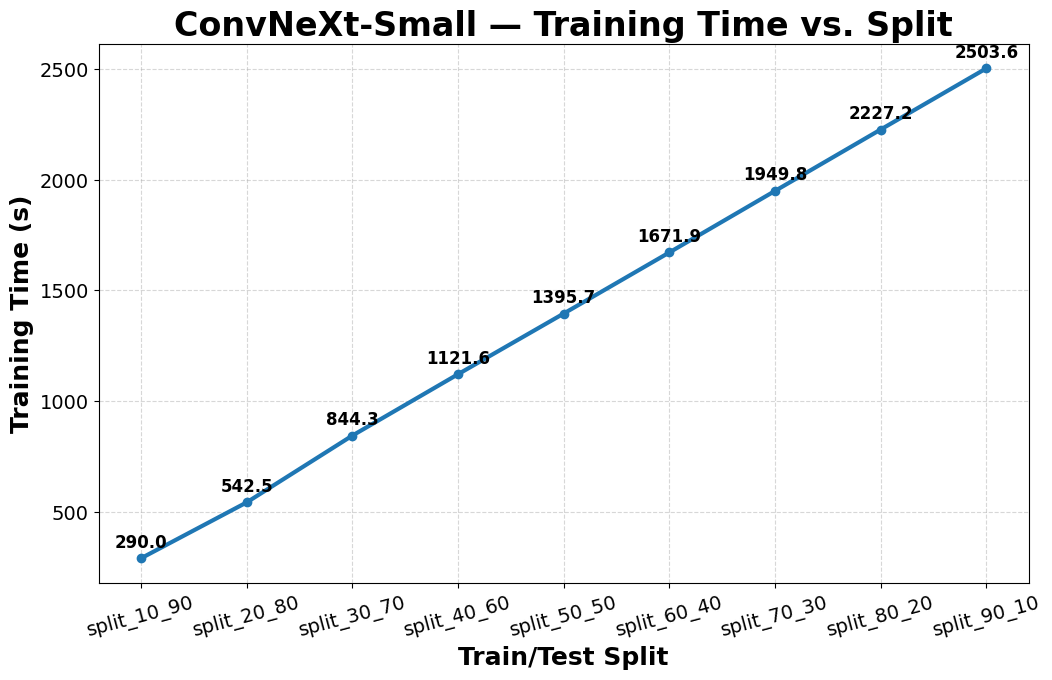

  Processing DenseNet-121 (Run 1)...
  Saved: DenseNet-121_(Run_1)_accuracy.png


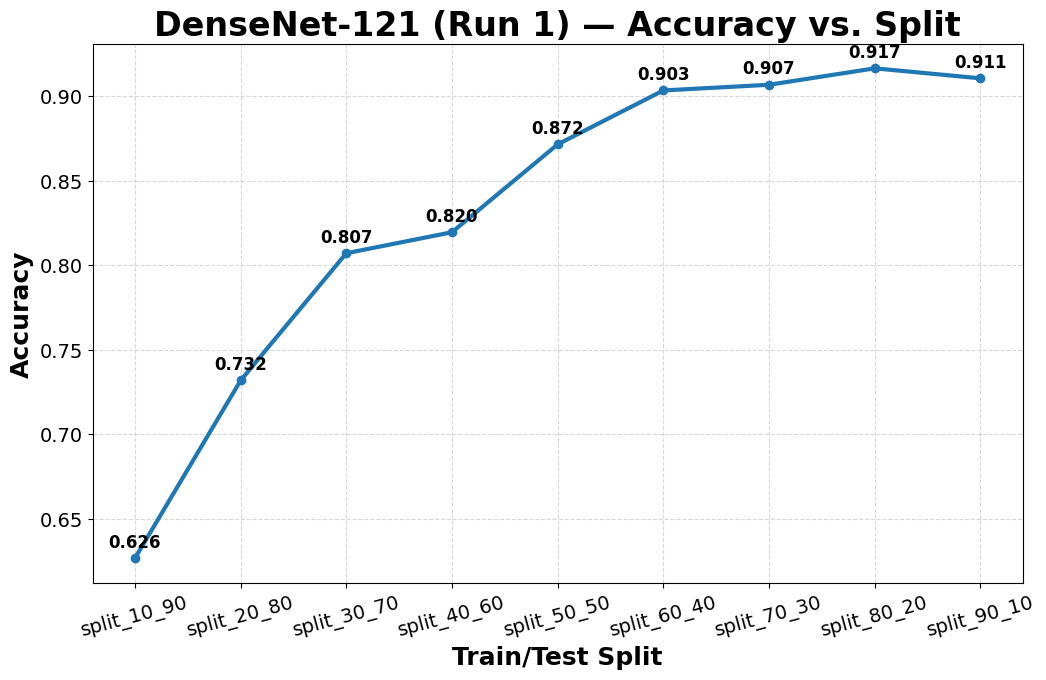

  Saved: DenseNet-121_(Run_1)_prf1.png


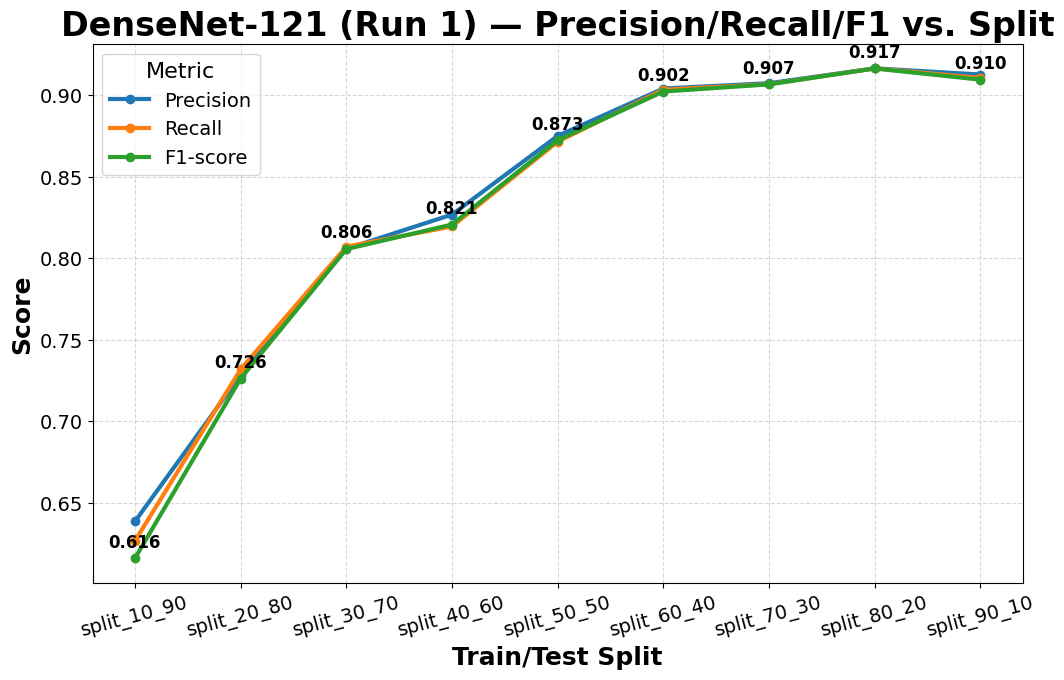

  Saved: DenseNet-121_(Run_1)_time.png


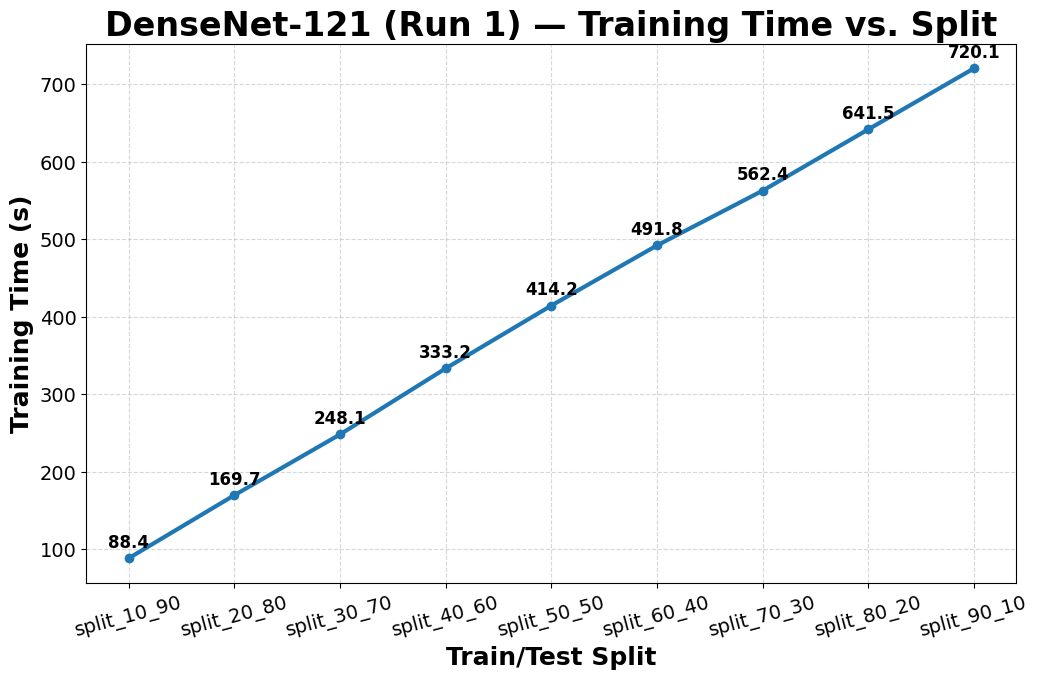

  Processing DenseNet-121 (Run 2)...
  Saved: DenseNet-121_(Run_2)_accuracy.png


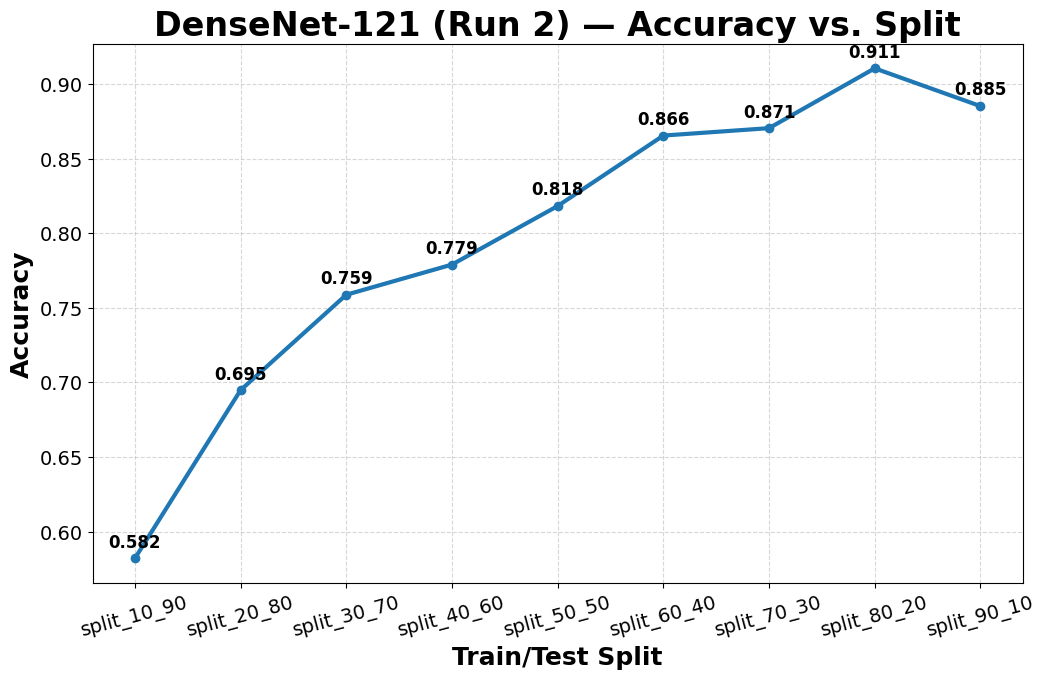

  Saved: DenseNet-121_(Run_2)_prf1.png


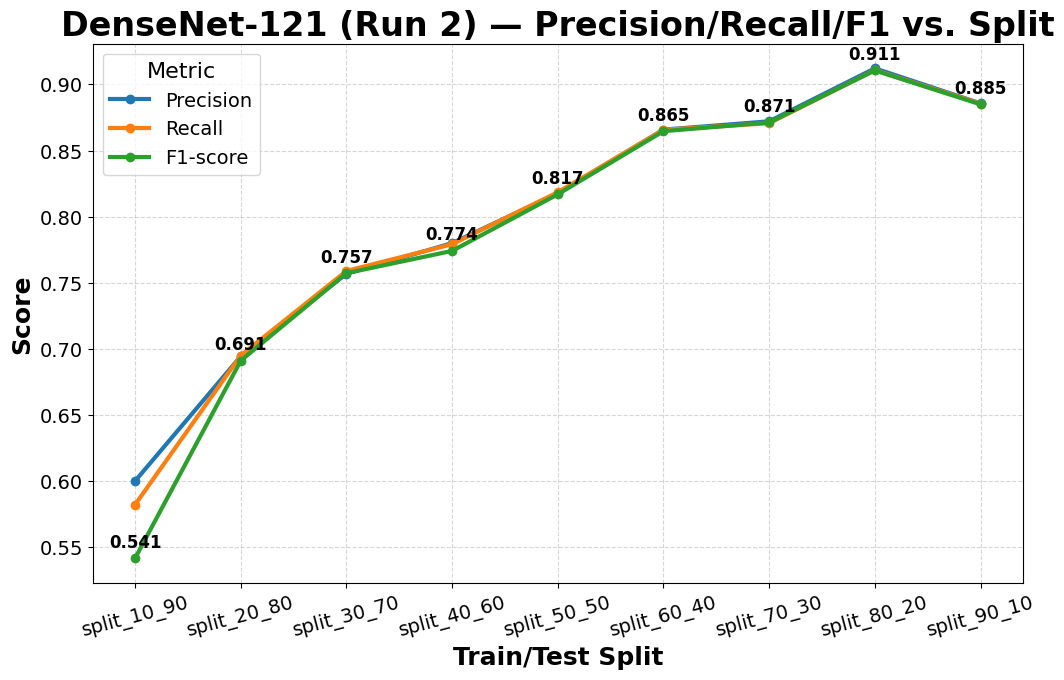

  Saved: DenseNet-121_(Run_2)_time.png


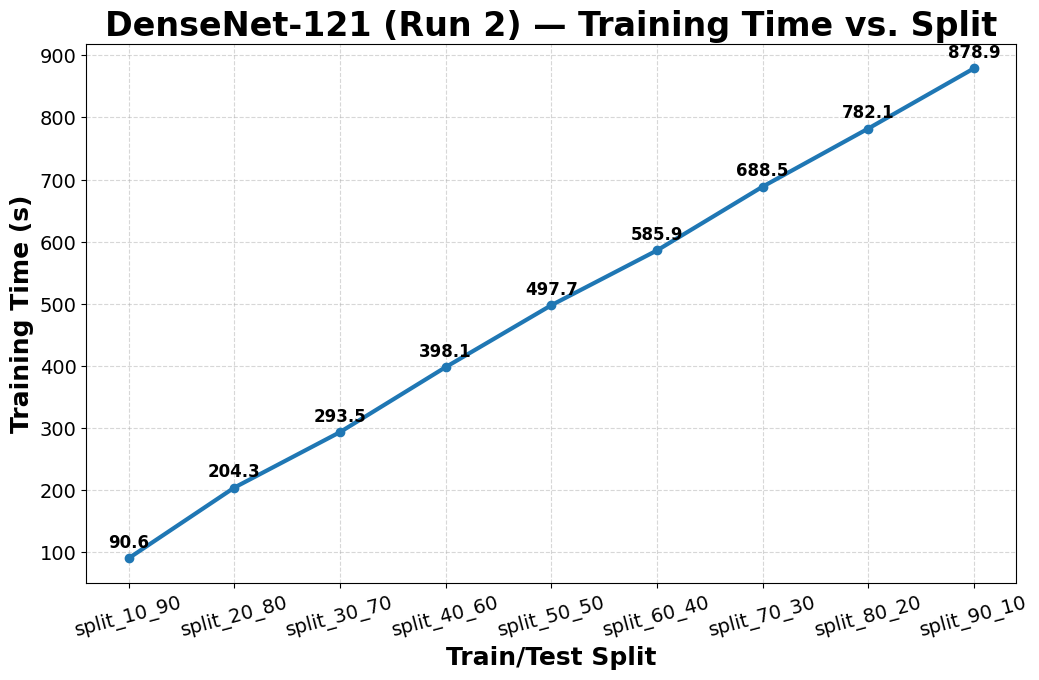

  Processing EfficientNet-B4...
  Saved: EfficientNet-B4_accuracy.png


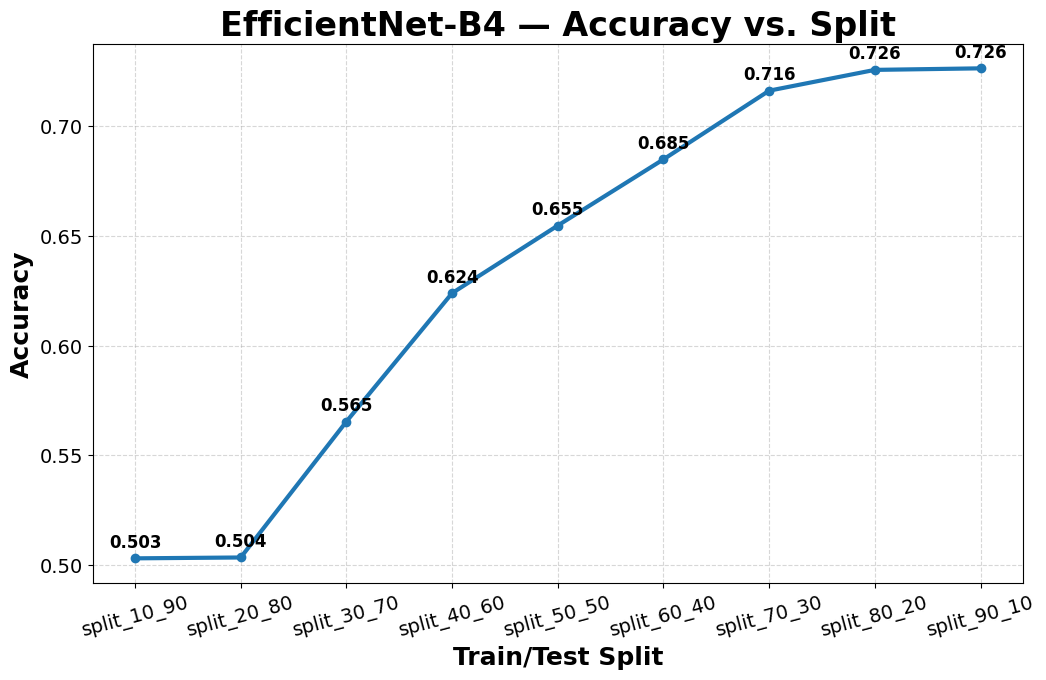

  Saved: EfficientNet-B4_prf1.png


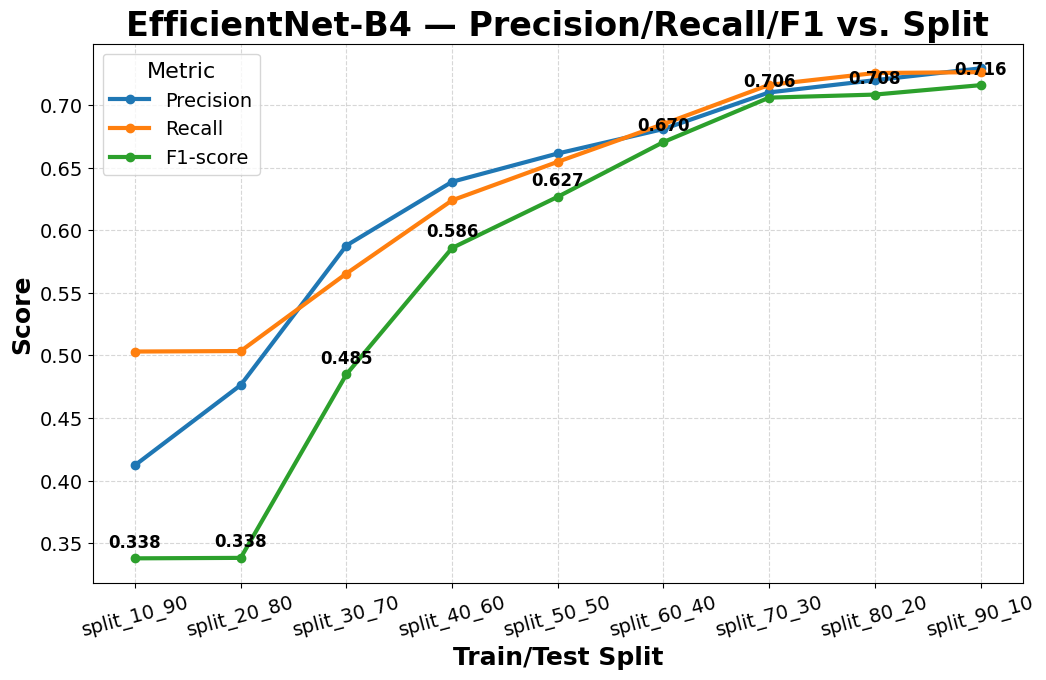

  Saved: EfficientNet-B4_time.png


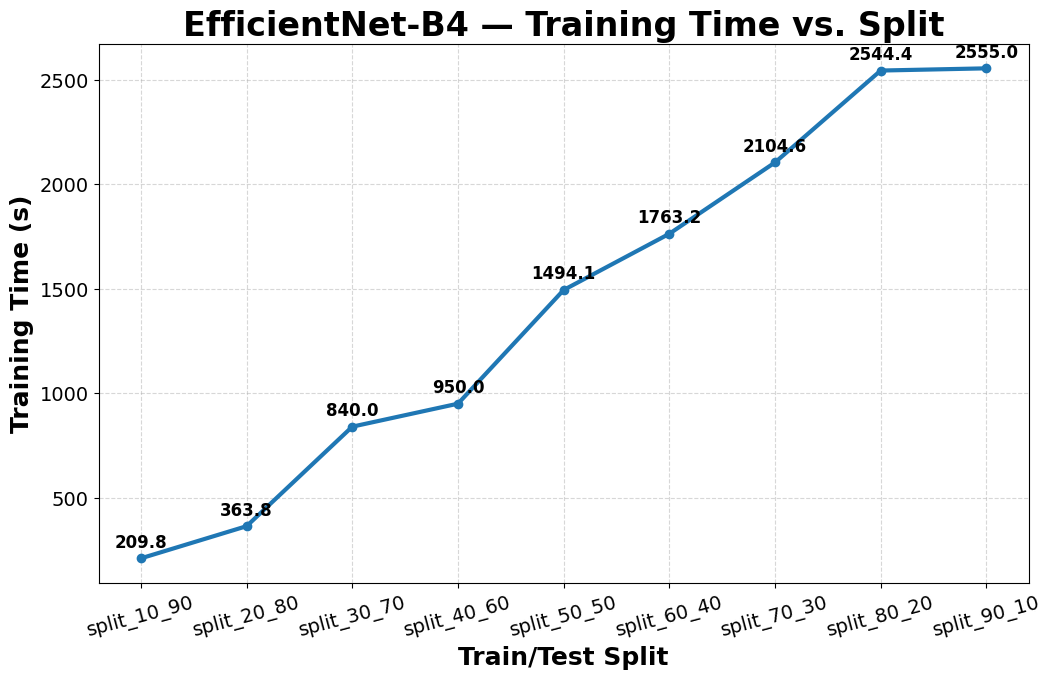

  Processing EfficientNetV2-S...
  Saved: EfficientNetV2-S_accuracy.png


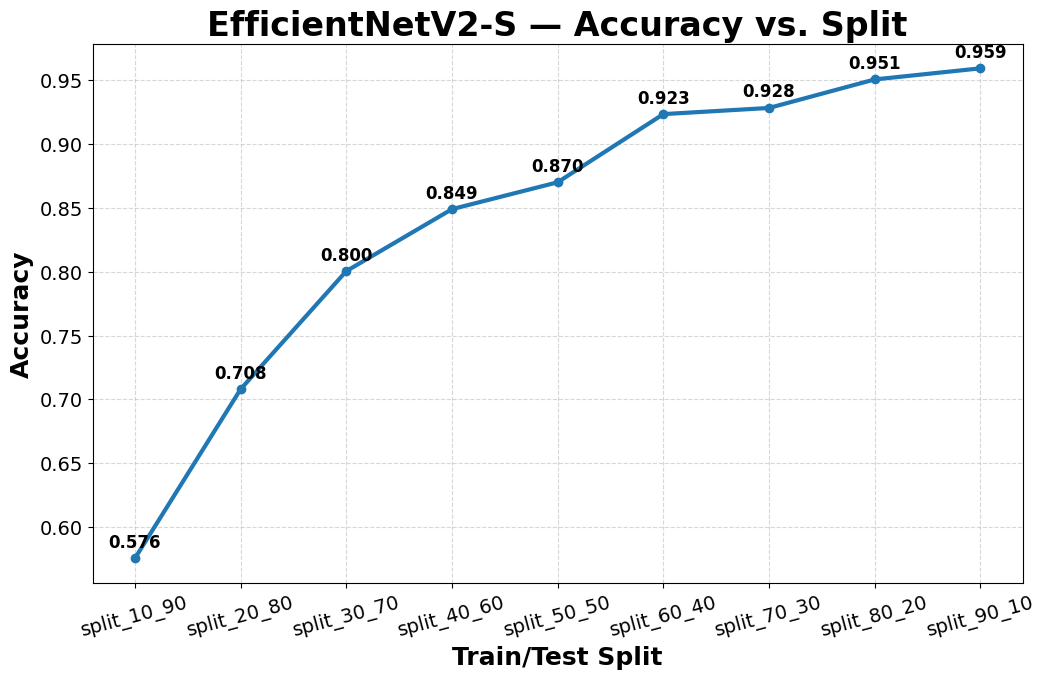

  Saved: EfficientNetV2-S_prf1.png


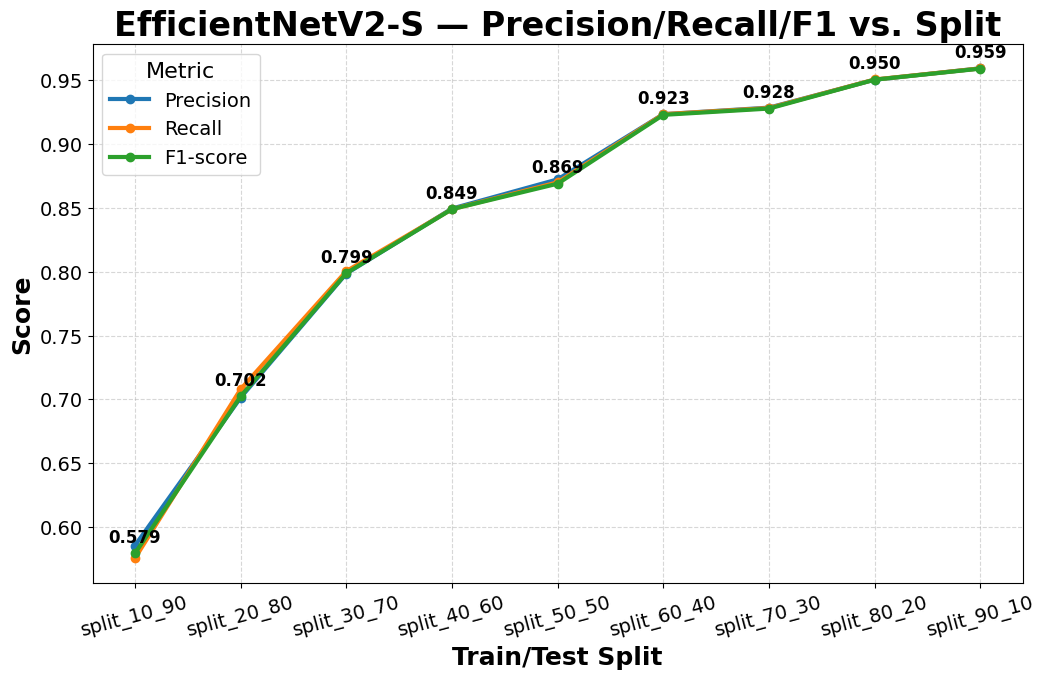

  Saved: EfficientNetV2-S_time.png


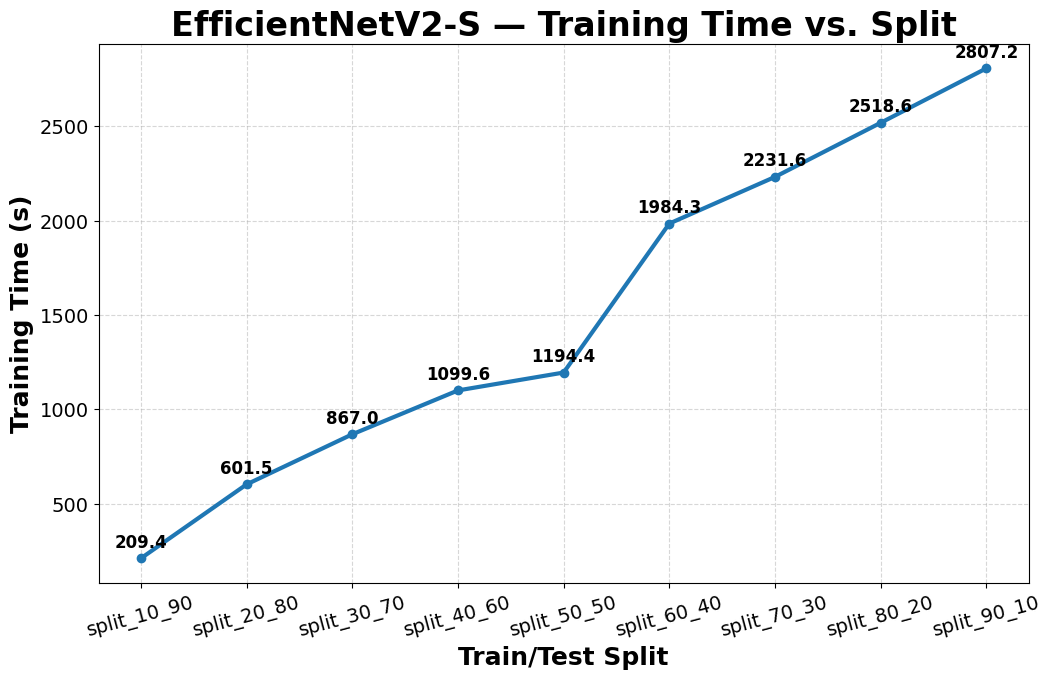


Generating cross-model comparison charts...
  Saved: comparison_avg_accuracy.png


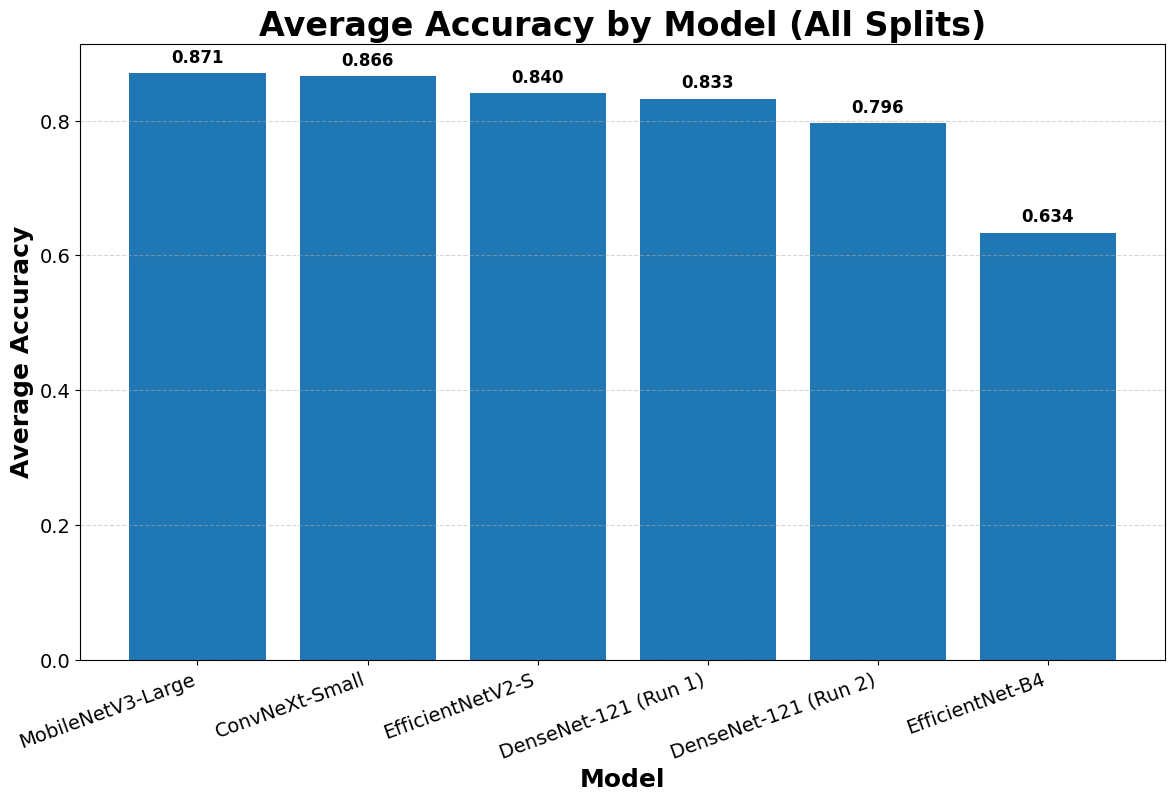


Model Ranking by Average Accuracy:
 1. MobileNetV3-Large         0.8705
 2. ConvNeXt-Small            0.8657
 3. EfficientNetV2-S          0.8405
 4. DenseNet-121 (Run 1)      0.8327
 5. DenseNet-121 (Run 2)      0.7962
 6. EfficientNet-B4           0.6337
  Saved: comparison_accuracy_by_split.png


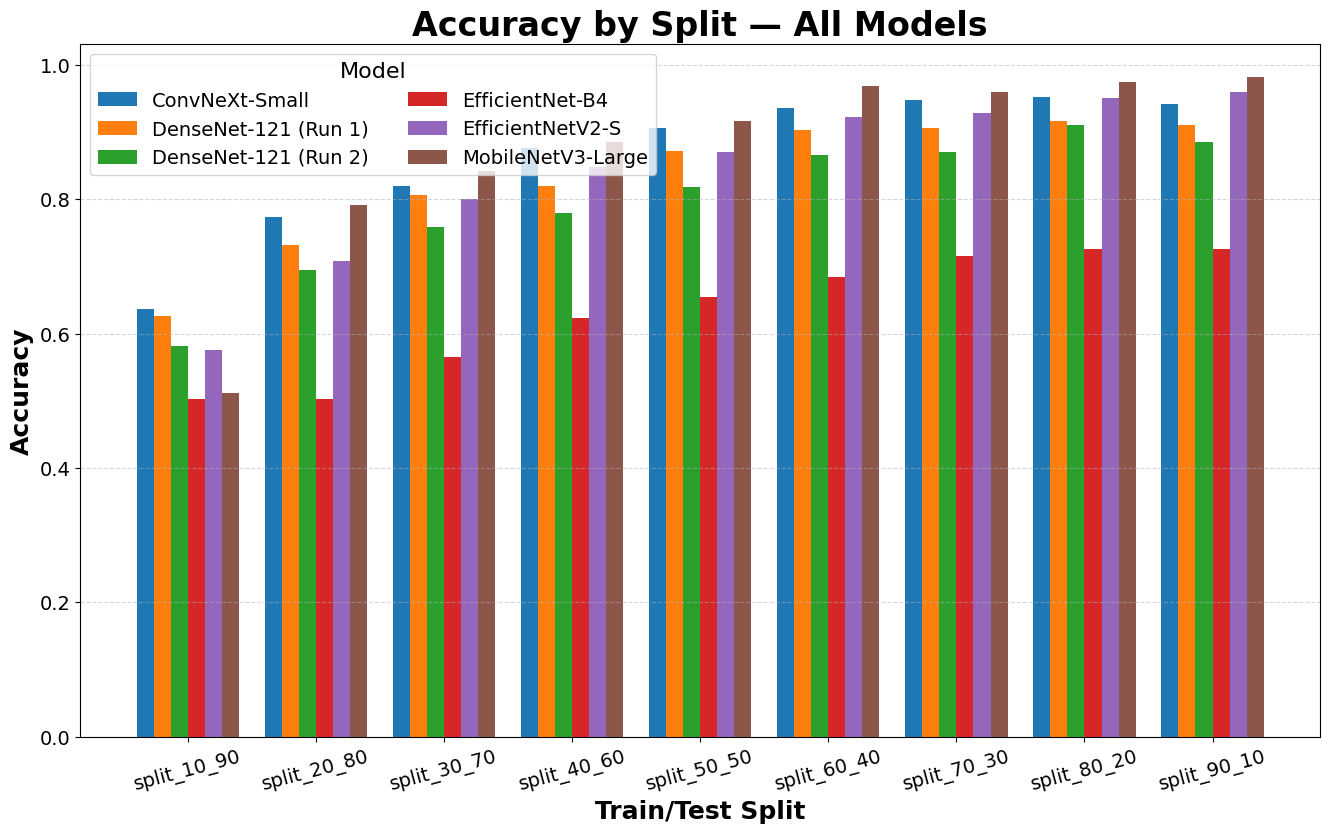

  Saved: comparison_avg_training_time.png


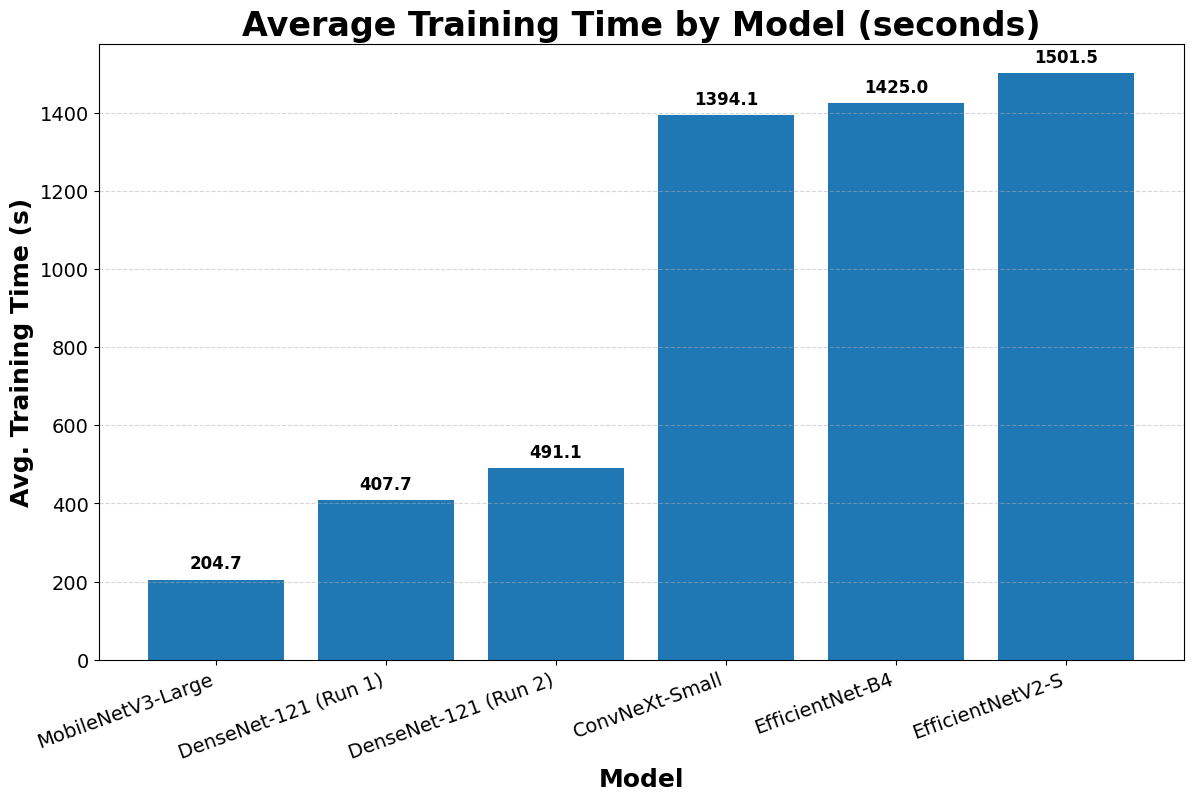


Model Ranking by Training Time (Fastest to Slowest):
 1. MobileNetV3-Large         204.7s
 2. DenseNet-121 (Run 1)      407.7s
 3. DenseNet-121 (Run 2)      491.1s
 4. ConvNeXt-Small            1394.1s
 5. EfficientNet-B4           1425.0s
 6. EfficientNetV2-S          1501.5s
  Saved: comparison_f1_by_split.png


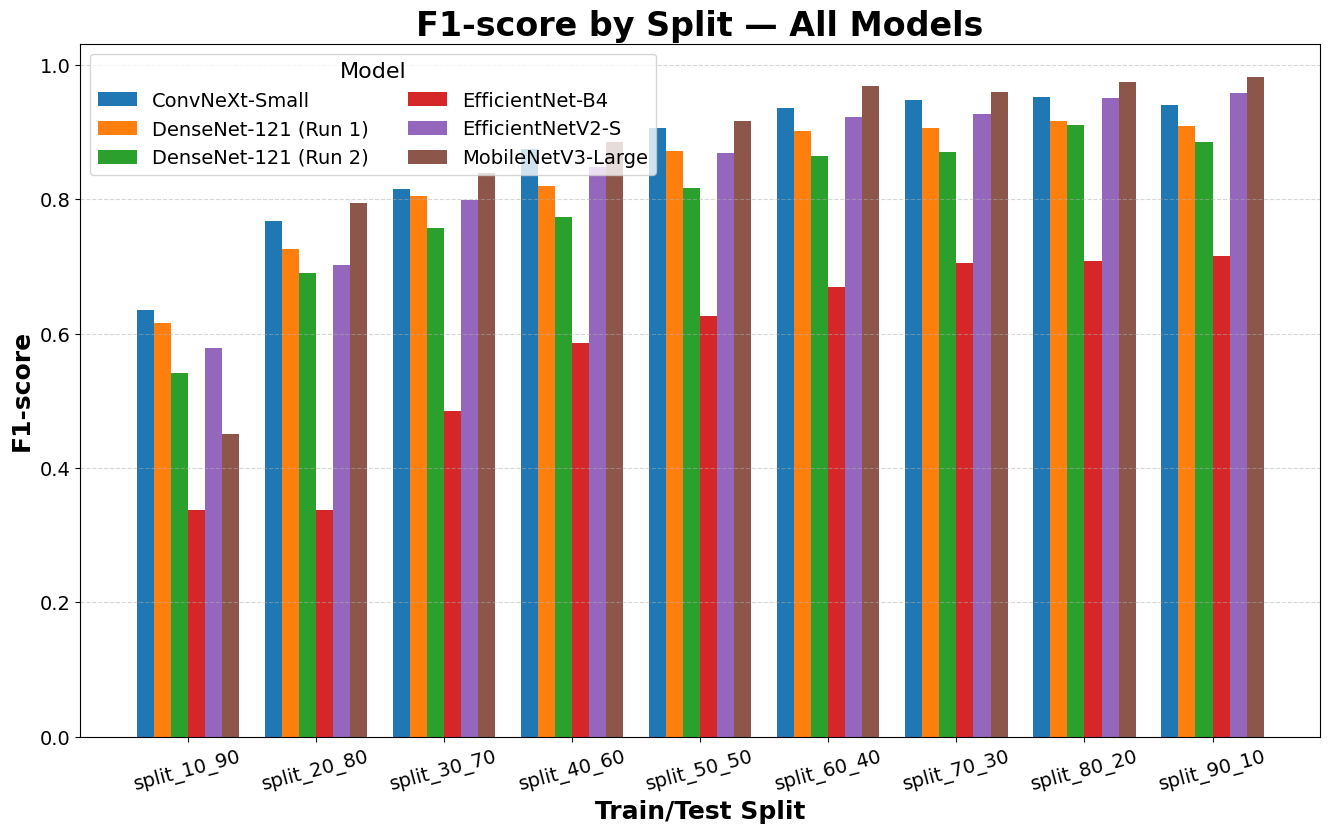


Generating interactive Plotly charts...
  Saved interactive: MobileNetV3-Large_accuracy_interactive.html
  Saved interactive: ConvNeXt-Small_accuracy_interactive.html
  Saved interactive: DenseNet-121_(Run_1)_accuracy_interactive.html
  Saved interactive: DenseNet-121_(Run_2)_accuracy_interactive.html
  Saved interactive: EfficientNet-B4_accuracy_interactive.html
  Saved interactive: EfficientNetV2-S_accuracy_interactive.html
  Saved interactive: comparison_accuracy_by_split_interactive.html
  Saved interactive: comparison_avg_accuracy_interactive.html
  Saved interactive: comparison_avg_training_time_interactive.html

EXECUTION COMPLETE!
Total files generated in /kaggle/working/brain_mri_charts:
  - CSV files: 2
  - Static charts: 22
  - Interactive charts: 10
  - Total: 34 files

Key Findings:
  - Best model by average accuracy: MobileNetV3-Large (0.8705)
  - Fastest model: MobileNetV3-Large (204.7s)
  - Slowest model: EfficientNetV2-S (1501.5s)


In [1]:
# ============================================
# Brain MRI: Model Metrics → Visualizations
# Static (matplotlib) + Interactive (Plotly)
# ============================================

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

# Optional (interactive)
try:
    import plotly.express as px
    import plotly.io as pio
    PLOTLY_OK = True
except Exception:
    PLOTLY_OK = False

# -----------------------------
# Output directory
# -----------------------------
OUT = Path("./brain_mri_charts")
OUT.mkdir(parents=True, exist_ok=True)
print(f"Output directory: {OUT.resolve()}")

# -----------------------------
# Global matplotlib formatting
# -----------------------------
mpl.rcParams.update({
    "figure.figsize": (12, 7),
    "font.size": 16,
    "axes.titlesize": 24,
    "axes.labelsize": 18,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.titleweight": "bold",
})

# -----------------------------
# Helpers
# -----------------------------
def df_from_rows(rows):
    df = pd.DataFrame(rows)
    # Ensure split rows are ordered by the numeric train % (10,20,...,90)
    order_key = df["split"].str.extract(r"(\d+)_\d+")[0].astype(int)
    df = df.assign(_order=order_key).sort_values("_order").drop(columns="_order").reset_index(drop=True)
    return df

def annotate_points(ax, x_idx, y_vals, fmt="{:.3f}", y_offset=8):
    for xi, yi in zip(x_idx, y_vals):
        ax.annotate(fmt.format(yi), (xi, yi), textcoords="offset points",
                    xytext=(0, y_offset), ha="center", fontsize=12, fontweight="bold")

def save_and_show(fig, filename, show=True):
    fig.savefig(OUT / filename, bbox_inches="tight", dpi=170)
    print(f"  Saved: {filename}")
    if show:
        plt.show()
    else:
        plt.close(fig)

# -----------------------------
# Paste your results
# -----------------------------
print("Loading model data...")
mobilenet_v3_large = df_from_rows([
    {"split":"split_10_90","accuracy":0.511533,"precision":0.472666,"recall":0.511533,"f1_score":0.450184,"training_time":15.468586},
    {"split":"split_20_80","accuracy":0.792384,"precision":0.802541,"recall":0.792384,"f1_score":0.794430,"training_time":101.326068},
    {"split":"split_30_70","accuracy":0.842849,"precision":0.843855,"recall":0.842849,"f1_score":0.839961,"training_time":104.212670},
    {"split":"split_40_60","accuracy":0.885188,"precision":0.887740,"recall":0.885188,"f1_score":0.885444,"training_time":150.704233},
    {"split":"split_50_50","accuracy":0.916570,"precision":0.917441,"recall":0.916570,"f1_score":0.916873,"training_time":144.666528},
    {"split":"split_60_40","accuracy":0.968477,"precision":0.968474,"recall":0.968477,"f1_score":0.968474,"training_time":289.130308},
    {"split":"split_70_30","accuracy":0.960543,"precision":0.960498,"recall":0.960543,"f1_score":0.960462,"training_time":223.756592},
    {"split":"split_80_20","accuracy":0.974782,"precision":0.974926,"recall":0.974782,"f1_score":0.974791,"training_time":382.935752},
    {"split":"split_90_10","accuracy":0.982524,"precision":0.982512,"recall":0.982524,"f1_score":0.982511,"training_time":429.871090},
])

convnext_small = df_from_rows([
    {"split":"split_10_90","accuracy":0.636775,"precision":0.634546,"recall":0.636775,"f1_score":0.635251,"training_time":290.025709},
    {"split":"split_20_80","accuracy":0.773466,"precision":0.770169,"recall":0.773466,"f1_score":0.767802,"training_time":542.540642},
    {"split":"split_30_70","accuracy":0.819568,"precision":0.825429,"recall":0.819568,"f1_score":0.815577,"training_time":844.342106},
    {"split":"split_40_60","accuracy":0.876455,"precision":0.877528,"recall":0.876455,"f1_score":0.874956,"training_time":1121.625662},
    {"split":"split_50_50","accuracy":0.906480,"precision":0.906529,"recall":0.906480,"f1_score":0.905963,"training_time":1395.717910},
    {"split":"split_60_40","accuracy":0.936469,"precision":0.936461,"recall":0.936469,"f1_score":0.936248,"training_time":1671.911056},
    {"split":"split_70_30","accuracy":0.948254,"precision":0.948387,"recall":0.948254,"f1_score":0.948274,"training_time":1949.841236},
    {"split":"split_80_20","accuracy":0.952473,"precision":0.952461,"recall":0.952473,"f1_score":0.952366,"training_time":2227.222875},
    {"split":"split_90_10","accuracy":0.941748,"precision":0.942265,"recall":0.941748,"f1_score":0.941317,"training_time":2503.637483},
])

densenet_121_run1 = df_from_rows([
    {"split":"split_10_90","accuracy":0.626428,"precision":0.638367,"recall":0.626428,"f1_score":0.615734,"training_time":88.385802},
    {"split":"split_20_80","accuracy":0.731749,"precision":0.728188,"recall":0.731749,"f1_score":0.726099,"training_time":169.700626},
    {"split":"split_30_70","accuracy":0.807095,"precision":0.805800,"recall":0.807095,"f1_score":0.805617,"training_time":248.054758},
    {"split":"split_40_60","accuracy":0.819534,"precision":0.826809,"recall":0.819534,"f1_score":0.820689,"training_time":333.181419},
    {"split":"split_50_50","accuracy":0.871556,"precision":0.875118,"recall":0.871556,"f1_score":0.872503,"training_time":414.224900},
    {"split":"split_60_40","accuracy":0.903492,"precision":0.904215,"recall":0.903492,"f1_score":0.902374,"training_time":491.754236},
    {"split":"split_70_30","accuracy":0.906856,"precision":0.907481,"recall":0.906856,"f1_score":0.906768,"training_time":562.409564},
    {"split":"split_80_20","accuracy":0.916586,"precision":0.916611,"recall":0.916586,"f1_score":0.916521,"training_time":641.465663},
    {"split":"split_90_10","accuracy":0.910680,"precision":0.912797,"recall":0.910680,"f1_score":0.909669,"training_time":720.117219},
])

densenet_121_run2 = df_from_rows([
    {"split":"split_10_90","accuracy":0.582022,"precision":0.599896,"recall":0.582022,"f1_score":0.541413,"training_time":90.557603},
    {"split":"split_20_80","accuracy":0.694882,"precision":0.694307,"recall":0.694882,"f1_score":0.690960,"training_time":204.277958},
    {"split":"split_30_70","accuracy":0.758869,"precision":0.756701,"recall":0.758869,"f1_score":0.757176,"training_time":293.513171},
    {"split":"split_40_60","accuracy":0.779107,"precision":0.779911,"recall":0.779107,"f1_score":0.774039,"training_time":398.096600},
    {"split":"split_50_50","accuracy":0.818393,"precision":0.817609,"recall":0.818393,"f1_score":0.816841,"training_time":497.732667},
    {"split":"split_60_40","accuracy":0.865664,"precision":0.865824,"recall":0.865664,"f1_score":0.864625,"training_time":585.891587},
    {"split":"split_70_30","accuracy":0.870634,"precision":0.872084,"recall":0.870634,"f1_score":0.871198,"training_time":688.507176},
    {"split":"split_80_20","accuracy":0.910766,"precision":0.912176,"recall":0.910766,"f1_score":0.910570,"training_time":782.058805},
    {"split":"split_90_10","accuracy":0.885437,"precision":0.885662,"recall":0.885437,"f1_score":0.884912,"training_time":878.856004},
])

efficientnet_b4 = df_from_rows([
    {"split":"split_10_90","accuracy":0.503126,"precision":0.412399,"recall":0.503126,"f1_score":0.338000,"training_time":209.842631},
    {"split":"split_20_80","accuracy":0.503517,"precision":0.476386,"recall":0.503517,"f1_score":0.338370,"training_time":363.769990},
    {"split":"split_30_70","accuracy":0.565410,"precision":0.587784,"recall":0.565410,"f1_score":0.484915,"training_time":840.035301},
    {"split":"split_40_60","accuracy":0.623868,"precision":0.638671,"recall":0.623868,"f1_score":0.585815,"training_time":950.033990},
    {"split":"split_50_50","accuracy":0.654637,"precision":0.661264,"recall":0.654637,"f1_score":0.626693,"training_time":1494.124134},
    {"split":"split_60_40","accuracy":0.684772,"precision":0.680800,"recall":0.684772,"f1_score":0.670393,"training_time":1763.249976},
    {"split":"split_70_30","accuracy":0.716041,"precision":0.710036,"recall":0.716041,"f1_score":0.705865,"training_time":2104.602802},
    {"split":"split_80_20","accuracy":0.725509,"precision":0.719785,"recall":0.725509,"f1_score":0.708299,"training_time":2544.441258},
    {"split":"split_90_10","accuracy":0.726214,"precision":0.729257,"recall":0.726214,"f1_score":0.715817,"training_time":2554.996111},
])

efficientnetv2_s = df_from_rows([
    {"split":"split_10_90","accuracy":0.575555,"precision":0.585557,"recall":0.575555,"f1_score":0.579376,"training_time":209.364409},
    {"split":"split_20_80","accuracy":0.707980,"precision":0.701371,"recall":0.707980,"f1_score":0.702363,"training_time":601.484343},
    {"split":"split_30_70","accuracy":0.800443,"precision":0.798541,"recall":0.800443,"f1_score":0.798868,"training_time":867.035979},
    {"split":"split_40_60","accuracy":0.848965,"precision":0.849452,"recall":0.848965,"f1_score":0.848979,"training_time":1099.555901},
    {"split":"split_50_50","accuracy":0.870004,"precision":0.872320,"recall":0.870004,"f1_score":0.868957,"training_time":1194.387525},
    {"split":"split_60_40","accuracy":0.923375,"precision":0.923386,"recall":0.923375,"f1_score":0.922852,"training_time":1984.304198},
    {"split":"split_70_30","accuracy":0.928202,"precision":0.928495,"recall":0.928202,"f1_score":0.927773,"training_time":2231.632533},
    {"split":"split_80_20","accuracy":0.950533,"precision":0.950384,"recall":0.950533,"f1_score":0.950398,"training_time":2518.564639},
    {"split":"split_90_10","accuracy":0.959223,"precision":0.959273,"recall":0.959223,"f1_score":0.959043,"training_time":2807.190982},
])

model_frames = {
    "MobileNetV3-Large": mobilenet_v3_large,
    "ConvNeXt-Small": convnext_small,
    "DenseNet-121 (Run 1)": densenet_121_run1,
    "DenseNet-121 (Run 2)": densenet_121_run2,
    "EfficientNet-B4": efficientnet_b4,
    "EfficientNetV2-S": efficientnetv2_s,
}

print(f"Loaded data for {len(model_frames)} models")

# -----------------------------
# Build long-format table + summary
# -----------------------------
print("\nBuilding dataframes and summaries...")
all_long = []
for name, df in model_frames.items():
    t = df.copy()
    t.insert(0, "model", name)
    all_long.append(t)

long_df = pd.concat(all_long, ignore_index=True)
long_df.to_csv(OUT / "brain_mri_model_metrics_long.csv", index=False)
print("  Saved: brain_mri_model_metrics_long.csv")

metrics = ["accuracy", "precision", "recall", "f1_score", "training_time"]
summary_df = long_df.groupby("model")[metrics].mean().reset_index()

idx_best = long_df.groupby("model")["accuracy"].idxmax()
best_rows = long_df.loc[idx_best, ["model", "split", "accuracy"]].rename(
    columns={"split": "best_split", "accuracy": "best_accuracy"}
)
summary_df = summary_df.merge(best_rows, on="model", how="left")
summary_df.to_csv(OUT / "brain_mri_model_summary.csv", index=False)
print("  Saved: brain_mri_model_summary.csv")

# Display summary table
print("\nModel Summary (Average Metrics):")
print("=" * 100)
print(f"{'Model':<25} {'Avg Accuracy':<12} {'Avg Precision':<12} {'Avg Recall':<12} {'Avg F1':<12} {'Avg Time (s)':<12} {'Best Split':<12} {'Best Accuracy':<12}")
print("-" * 100)
for _, row in summary_df.iterrows():
    print(f"{row['model']:<25} {row['accuracy']:<12.4f} {row['precision']:<12.4f} {row['recall']:<12.4f} {row['f1_score']:<12.4f} {row['training_time']:<12.1f} {row['best_split']:<12} {row['best_accuracy']:<12.4f}")

# -----------------------------
# Matplotlib — Individual model charts
# -----------------------------
def plot_individual(model_name, df):
    splits = df["split"].tolist()
    x_idx = np.arange(len(splits))

    # 1) Accuracy vs Split
    fig, ax = plt.subplots()
    ax.plot(x_idx, df["accuracy"], marker="o", linewidth=3)
    ax.set_title(f"{model_name} — Accuracy vs. Split")
    ax.set_xlabel("Train/Test Split", fontweight="bold")
    ax.set_ylabel("Accuracy", fontweight="bold")
    ax.set_xticks(x_idx)
    ax.set_xticklabels(splits, rotation=15)
    ax.grid(True, linestyle="--", alpha=0.5)
    annotate_points(ax, x_idx, df["accuracy"].values)
    save_and_show(fig, f"{model_name.replace(' ', '_').replace('/','-')}_accuracy.png")

    # 2) Precision / Recall / F1 vs Split
    fig, ax = plt.subplots()
    ax.plot(x_idx, df["precision"], marker="o", linewidth=3, label="Precision")
    ax.plot(x_idx, df["recall"], marker="o", linewidth=3, label="Recall")
    ax.plot(x_idx, df["f1_score"], marker="o", linewidth=3, label="F1-score")
    ax.set_title(f"{model_name} — Precision/Recall/F1 vs. Split")
    ax.set_xlabel("Train/Test Split", fontweight="bold")
    ax.set_ylabel("Score", fontweight="bold")
    ax.set_xticks(x_idx)
    ax.set_xticklabels(splits, rotation=15)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend(title="Metric")
    annotate_points(ax, x_idx, df["f1_score"].values)
    save_and_show(fig, f"{model_name.replace(' ', '_').replace('/','-')}_prf1.png")

    # 3) Training Time vs Split
    fig, ax = plt.subplots()
    ax.plot(x_idx, df["training_time"], marker="o", linewidth=3)
    ax.set_title(f"{model_name} — Training Time vs. Split")
    ax.set_xlabel("Train/Test Split", fontweight="bold")
    ax.set_ylabel("Training Time (s)", fontweight="bold")
    ax.set_xticks(x_idx)
    ax.set_xticklabels(splits, rotation=15)
    ax.grid(True, linestyle="--", alpha=0.5)
    annotate_points(ax, x_idx, df["training_time"].values, fmt="{:.1f}")
    save_and_show(fig, f"{model_name.replace(' ', '_').replace('/','-')}_time.png")

print("\nGenerating individual model charts...")
for name, df in model_frames.items():
    print(f"  Processing {name}...")
    plot_individual(name, df)

# -----------------------------
# Matplotlib — Cross-model comparisons
# -----------------------------
print("\nGenerating cross-model comparison charts...")

# 4) Average Accuracy Leaderboard
ranked = summary_df.sort_values("accuracy", ascending=False)
fig, ax = plt.subplots(figsize=(14, 8))
x_idx = np.arange(len(ranked))
bars = ax.bar(x_idx, ranked["accuracy"].values)
ax.set_title("Average Accuracy by Model (All Splits)")
ax.set_xlabel("Model", fontweight="bold")
ax.set_ylabel("Average Accuracy", fontweight="bold")
ax.set_xticks(x_idx)
ax.set_xticklabels(ranked["model"].tolist(), rotation=20, ha="right")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
for rect, v in zip(bars, ranked["accuracy"].values):
    ax.annotate(f"{v:.3f}", (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold",
                xytext=(0, 5), textcoords="offset points")
save_and_show(fig, "comparison_avg_accuracy.png")

# Display ranking
print("\nModel Ranking by Average Accuracy:")
print("=" * 50)
for i, (_, row) in enumerate(ranked.iterrows(), 1):
    print(f"{i:2d}. {row['model']:<25} {row['accuracy']:.4f}")

# 5) Accuracy by Split — Grouped Bars
wide_acc = long_df.pivot_table(index="split", columns="model", values="accuracy")
splits = wide_acc.index.tolist()
models = wide_acc.columns.tolist()
n_models = len(models)
x = np.arange(len(splits))
width = 0.8 / n_models

fig, ax = plt.subplots(figsize=(16, 9))
for i, m in enumerate(models):
    vals = wide_acc[m].values
    ax.bar(x + i*width, vals, width=width, label=m)
ax.set_title("Accuracy by Split — All Models")
ax.set_xlabel("Train/Test Split", fontweight="bold")
ax.set_ylabel("Accuracy", fontweight="bold")
ax.set_xticks(x + width*(n_models-1)/2)
ax.set_xticklabels(splits, rotation=15)
ax.legend(title="Model", ncol=2)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
save_and_show(fig, "comparison_accuracy_by_split.png")

# 6) Average Training Time by Model
ranked_time = summary_df.sort_values("training_time", ascending=True)
fig, ax = plt.subplots(figsize=(14, 8))
x_idx = np.arange(len(ranked_time))
bars = ax.bar(x_idx, ranked_time["training_time"].values)
ax.set_title("Average Training Time by Model (seconds)")
ax.set_xlabel("Model", fontweight="bold")
ax.set_ylabel("Avg. Training Time (s)", fontweight="bold")
ax.set_xticks(x_idx)
ax.set_xticklabels(ranked_time["model"].tolist(), rotation=20, ha="right")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
for rect, v in zip(bars, ranked_time["training_time"].values):
    ax.annotate(f"{v:.1f}", (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold",
                xytext=(0, 5), textcoords="offset points")
save_and_show(fig, "comparison_avg_training_time.png")

# Display training time ranking
print("\nModel Ranking by Training Time (Fastest to Slowest):")
print("=" * 60)
for i, (_, row) in enumerate(ranked_time.iterrows(), 1):
    print(f"{i:2d}. {row['model']:<25} {row['training_time']:.1f}s")

# 7) F1-score by Split — Grouped Bars
wide_f1 = long_df.pivot_table(index="split", columns="model", values="f1_score")
fig, ax = plt.subplots(figsize=(16, 9))
for i, m in enumerate(models):
    vals = wide_f1[m].values
    ax.bar(x + i*width, vals, width=width, label=m)
ax.set_title("F1-score by Split — All Models")
ax.set_xlabel("Train/Test Split", fontweight="bold")
ax.set_ylabel("F1-score", fontweight="bold")
ax.set_xticks(x + width*(n_models-1)/2)
ax.set_xticklabels(splits, rotation=15)
ax.legend(title="Model", ncol=2)
ax.grid(True, axis="y", linestyle="--", alpha=0.5)
save_and_show(fig, "comparison_f1_by_split.png")

# -----------------------------
# Optional: Interactive Plotly charts (saved as HTML)
# -----------------------------
if PLOTLY_OK:
    print("\nGenerating interactive Plotly charts...")
    # Long-format CSV is useful for Plotly
    # 1) Interactive: Accuracy vs Split for each model
    for name, df in model_frames.items():
        fig = px.line(
            df.assign(split_order=np.arange(len(df))),
            x="split_order", y="accuracy",
            markers=True,
            title=f"{name} — Accuracy vs. Split (Interactive)",
        )
        fig.update_layout(
            title_font_size=26, font_size=16,
            xaxis=dict(
                tickmode="array",
                tickvals=list(range(len(df))),
                ticktext=df["split"].tolist(),
                title="Train/Test Split"
            ),
            yaxis_title="Accuracy",
        )
        pio.write_html(fig, OUT / f"{name.replace(' ', '_').replace('/','-')}_accuracy_interactive.html", auto_open=False)
        print(f"  Saved interactive: {name.replace(' ', '_').replace('/','-')}_accuracy_interactive.html")

    # 2) Interactive: Grouped Accuracy by Split
    long_acc = long_df[["model","split","accuracy"]].copy()
    fig = px.bar(long_acc, x="split", y="accuracy", color="model", barmode="group",
                 title="Accuracy by Split — All Models (Interactive)")
    fig.update_layout(title_font_size=26, font_size=16, xaxis_title="Train/Test Split", yaxis_title="Accuracy")
    pio.write_html(fig, OUT / "comparison_accuracy_by_split_interactive.html", auto_open=False)
    print("  Saved interactive: comparison_accuracy_by_split_interactive.html")

    # 3) Interactive: Average Accuracy Leaderboard
    fig = px.bar(ranked, x="model", y="accuracy", title="Average Accuracy by Model (Interactive)")
    fig.update_layout(title_font_size=26, font_size=16, xaxis_title="Model", yaxis_title="Average Accuracy", xaxis_tickangle=20)
    pio.write_html(fig, OUT / "comparison_avg_accuracy_interactive.html", auto_open=False)
    print("  Saved interactive: comparison_avg_accuracy_interactive.html")

    # 4) Interactive: Average Training Time
    fig = px.bar(ranked_time, x="model", y="training_time", title="Average Training Time by Model (Interactive)")
    fig.update_layout(title_font_size=26, font_size=16, xaxis_title="Model", yaxis_title="Avg. Training Time (s)", xaxis_tickangle=20)
    pio.write_html(fig, OUT / "comparison_avg_training_time_interactive.html", auto_open=False)
    print("  Saved interactive: comparison_avg_training_time_interactive.html")
else:
    print("\nPlotly not available - skipping interactive charts")

# Final summary
print("\n" + "="*70)
print("EXECUTION COMPLETE!")
print("="*70)
print(f"Total files generated in {OUT.resolve()}:")
print(f"  - CSV files: 2")
print(f"  - Static charts: {len(model_frames) * 3 + 4}")  # 3 per model + 4 comparisons
if PLOTLY_OK:
    print(f"  - Interactive charts: {len(model_frames) + 4}")  # 1 per model + 4 comparisons
print(f"  - Total: {2 + len(model_frames) * 3 + 4 + (len(model_frames) + 4 if PLOTLY_OK else 0)} files")
print("\nKey Findings:")
print(f"  - Best model by average accuracy: {ranked.iloc[0]['model']} ({ranked.iloc[0]['accuracy']:.4f})")
print(f"  - Fastest model: {ranked_time.iloc[0]['model']} ({ranked_time.iloc[0]['training_time']:.1f}s)")
print(f"  - Slowest model: {ranked_time.iloc[-1]['model']} ({ranked_time.iloc[-1]['training_time']:.1f}s)")
print("="*70)